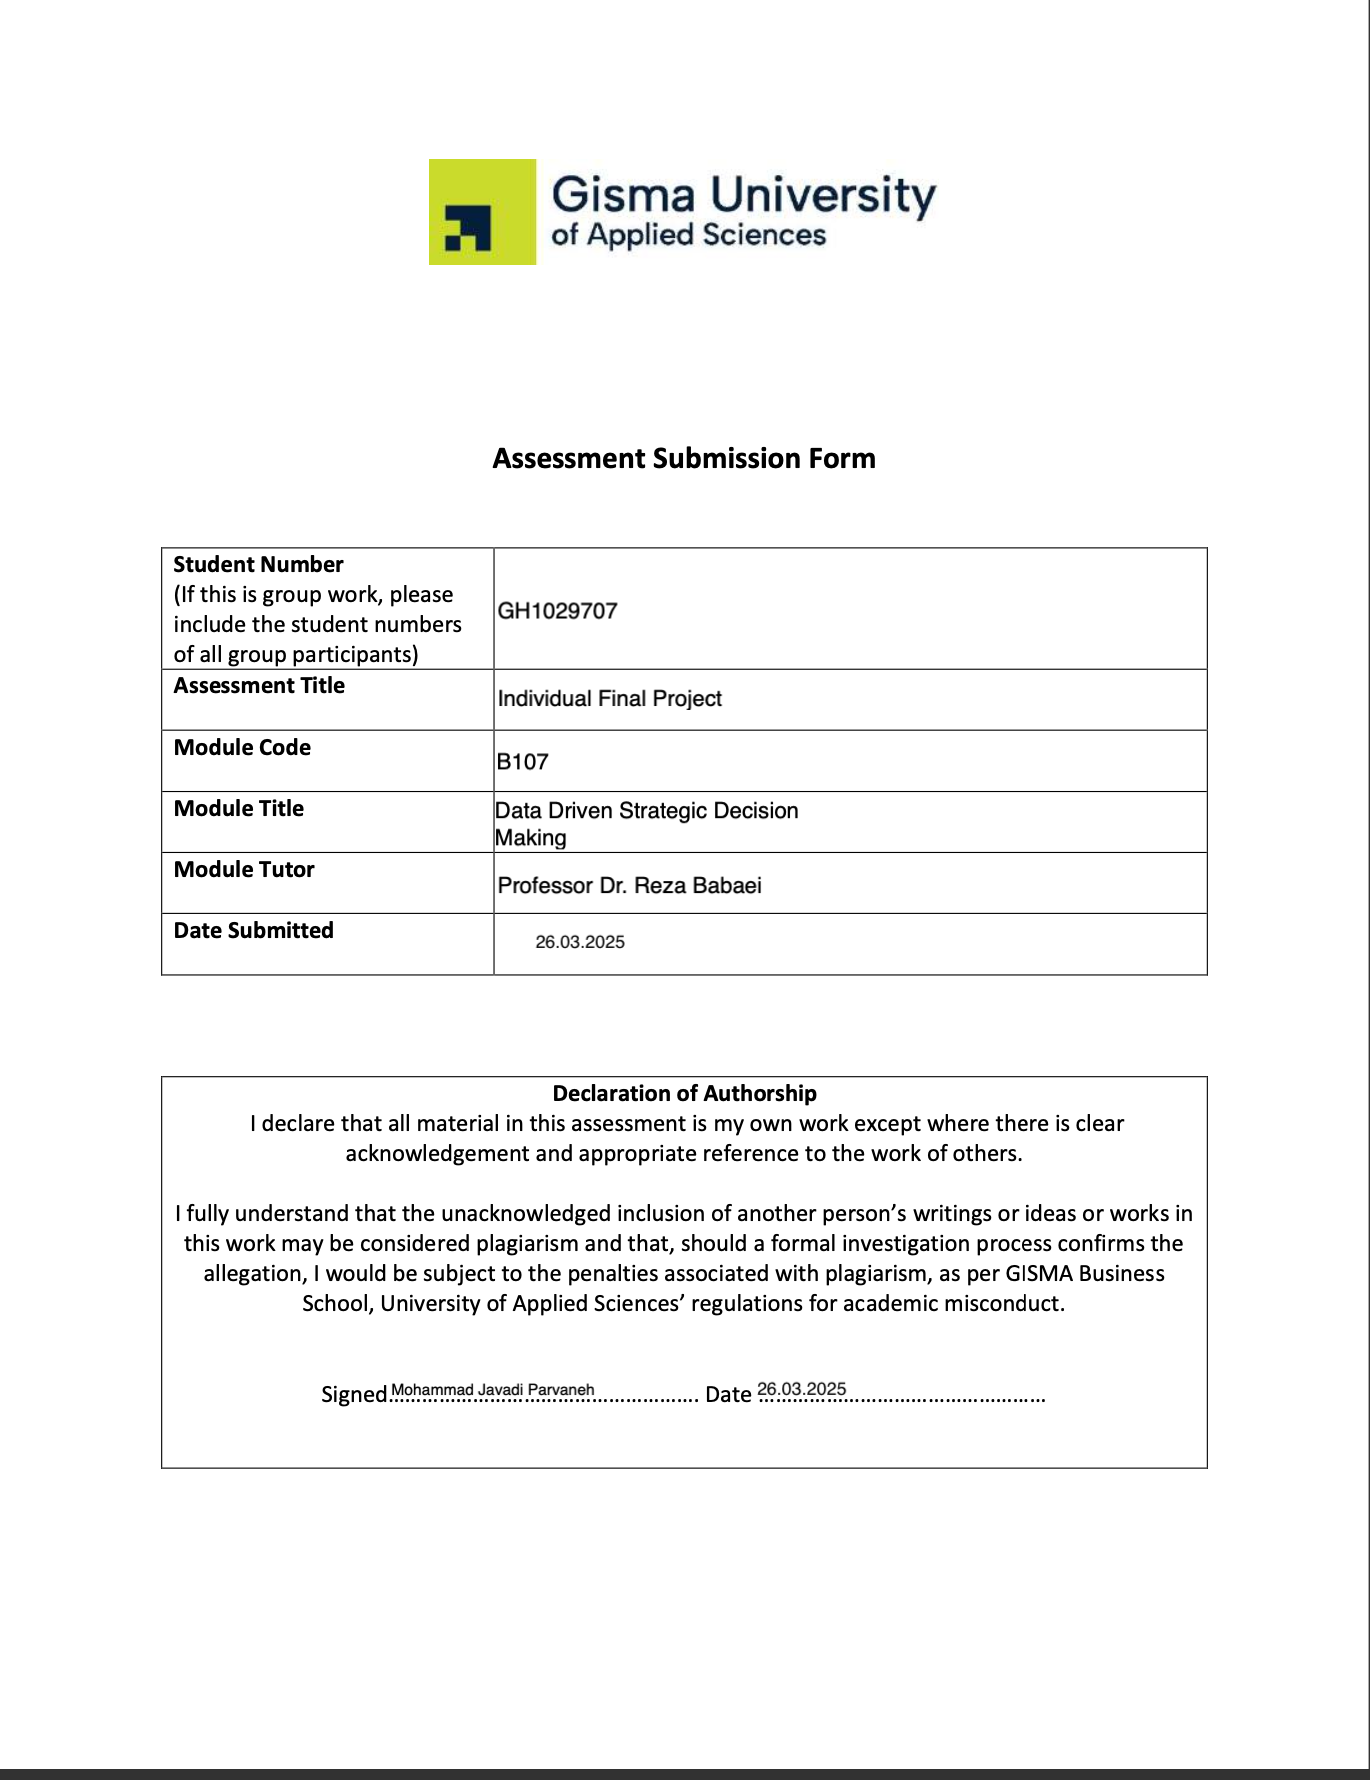

### ***My project GitHub repository link:***
















https://github.com/mohammadjavadi8804/B107-Data-Driven-Strategic.git

# ***Step 1:***
# ***Choose a Dataset***





**Why I choosed this Dataset and it is suitable for my Analysis?**

**1-**It has a great structure : this dataset consists of nodesand edges (connections or interaction between users)

**2-**This dataset meet our standards in terms of size: because it has 6486 nodes which meet the our minimum requirements(1000,1500).

**3-**The dataset is derived from The marvel universe  and it is represents a  network among characters in Marvel comics.In this dataset nodes represent individual characters and edges denote co appearances in the same comic book.



In [ ]:
#✅First step is importing essential libraries to my code
import kagglehub
import os
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
#Second step is downloading the latest version of dataset and get the dataset path
dataset_folder = kagglehub.dataset_download("csanhueza/the-marvel-universe-social-network")
print("path to dataset files:", dataset_folder)
#I tried to check my downloaded files
print("Files in dataset folder:", os.listdir(dataset_folder))
#I load the CSV files into DataFrames
hero_network_df = pd.read_csv(f"{dataset_folder}/hero-network.csv")
nodes_df = pd.read_csv(f"{dataset_folder}/nodes.csv")
edges_df = pd.read_csv(f"{dataset_folder}/edges.csv")
#I tried to check basic information of the datasets
#For checking missing values and data types
print(nodes_df.info())
#For knowing about the summary of dataset
print(nodes_df.describe())
#For counting the duplicate rows
print(nodes_df.duplicated().sum())
#I am trying to remove dublicate rows and rows with misssing values in nodes_df
nodes_df = nodes_df.drop_duplicates().dropna()
#For saving the cleaned data
nodes_df.to_csv("cleaned_nodes.csv", index=False)
#I want to clean the other datasets as well
edges_df = edges_df.drop_duplicates().dropna()
edges_df.to_csv("cleaned_edges.csv", index=False)
hero_network_df = hero_network_df.drop_duplicates().dropna()
hero_network_df.to_csv("cleaned_hero_network.csv", index=False)

#After implementing that changes our databases ready to use.


path to dataset files: /root/.cache/kagglehub/datasets/csanhueza/the-marvel-universe-social-network/versions/1
Files in dataset folder: ['edges.csv', 'nodes.csv', 'hero-network.csv']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19090 entries, 0 to 19089
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   node    19090 non-null  object
 1   type    19090 non-null  object
dtypes: object(2)
memory usage: 298.4+ KB
None
           node   type
count     19090  19090
unique    19090      2
top     2001 10  comic
freq          1  12651
0


In [ ]:
#✅For knowing the columns name
print(edges_df.columns)


Index(['hero', 'comic'], dtype='object')


In [ ]:

#✅I used networkx for my work and that is why I have to install it in advance
!pip install networkx


In [ ]:
#✅ I created the graph from Edges Data frame
import networkx as nx
#I tried to create a graph from DataFrame edges
G = nx.from_pandas_edgelist(edges_df, source="hero", target="comic")



In [ ]:
#✅ I tried to analyze the graph
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
#For knowing the nodes degrees
print("\nNode Degree")
for v in G:
    print(f"{v:4} {G.degree(v):6}")


Streaming output truncated to the last 5000 lines.
KETCH, DORIS AUDRA     20
KEY/      4
KHADIJAH      1
KHANDRUVITCH, DR. VA      2
KHAN      1
W2 131      3
KHAT      2
KHATYLIS      1
CPU 2/2      6
KHIRN      4
KHOON      2
KHORYPHOS [ETERNAL]     11
KHYBER/      1
KICKBACK/RICHARD      3
KID COLT      5
KID COLT II/ELRIC FR      2
KID COLT OUTLAW 201      2
KID/E.B. FARRELL      1
KID QUARRY      1
KID REAPER      3
KIKO      1
KILGREW, BASIL BETA      1
KILGREW, GERARD      1
KILLBREW, DR.      6
KILLBURN, MACK      6
KILLDRAGON, HARMONY      1
KILLER CLOWN      2
KILLER SHRIKE/SIMON     14
PPTSS 102      4
WOSM 91      6
KILLIAN      3
KILLMONGER, ERIC/N'J     23
KILLOBYTE      3
KILLRAVEN/JONATHAN R     22
AA2 20      5
AA2 38      1
KILMER      3
KIMBLE, DR.      1
KINCAID, DR. JANE FO    121
JIM 100      4
JIM 87      2
JIM 88      4
JIM 89      2
JIM 90      2
JIM 91      4
JIM 93      3
JIM 96      4
JIM 99      4
T 279      5
KINCAID, DR. KEITH     28
KINCAID, JIMMY      9

# ***Step 2:***
# ***Constructing the network.***
I tried to create a main network and generate the necessary graphs, such as Erdos-Renyi, Watts-Strogatz, Barbasi-Albert and the Marvel universe social network( the primary focus).
I utilized Python tools and the NetworkX library to construct these networks. The purpose of creating these graphs is to compare them with the main graph.Identify similarities and reach a deeper understanding of their structures.

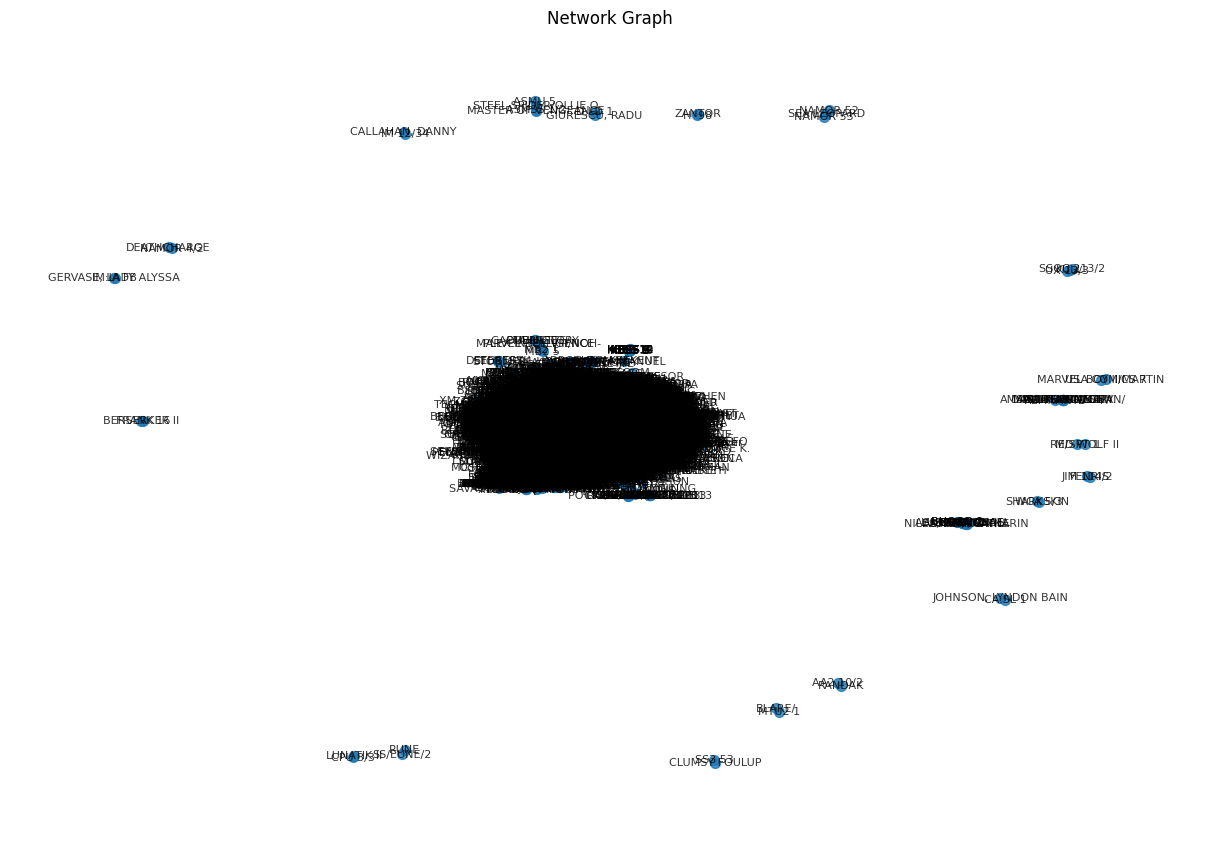

In [ ]:
# ⏰⏰❇️✅Ploting the marvel universe social network dataset⏰⏰❇️
#I tried to visualize the graph by using the matplotlib
#I have to import it first
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
nx.draw_spring(G, with_labels=True, node_size=50, font_size=8, alpha=0.8)
plt.title("Network Graph")
plt.show()
#I ploted the network above and take an screenshot. I uploaded the picture of it in the Text below.


The code above runs without any fault and on my macbook it tooks 30 minutes to plot.

then,I decided to make an screenshot of it and uploaded it here.

The reason:it is too heavy for me.

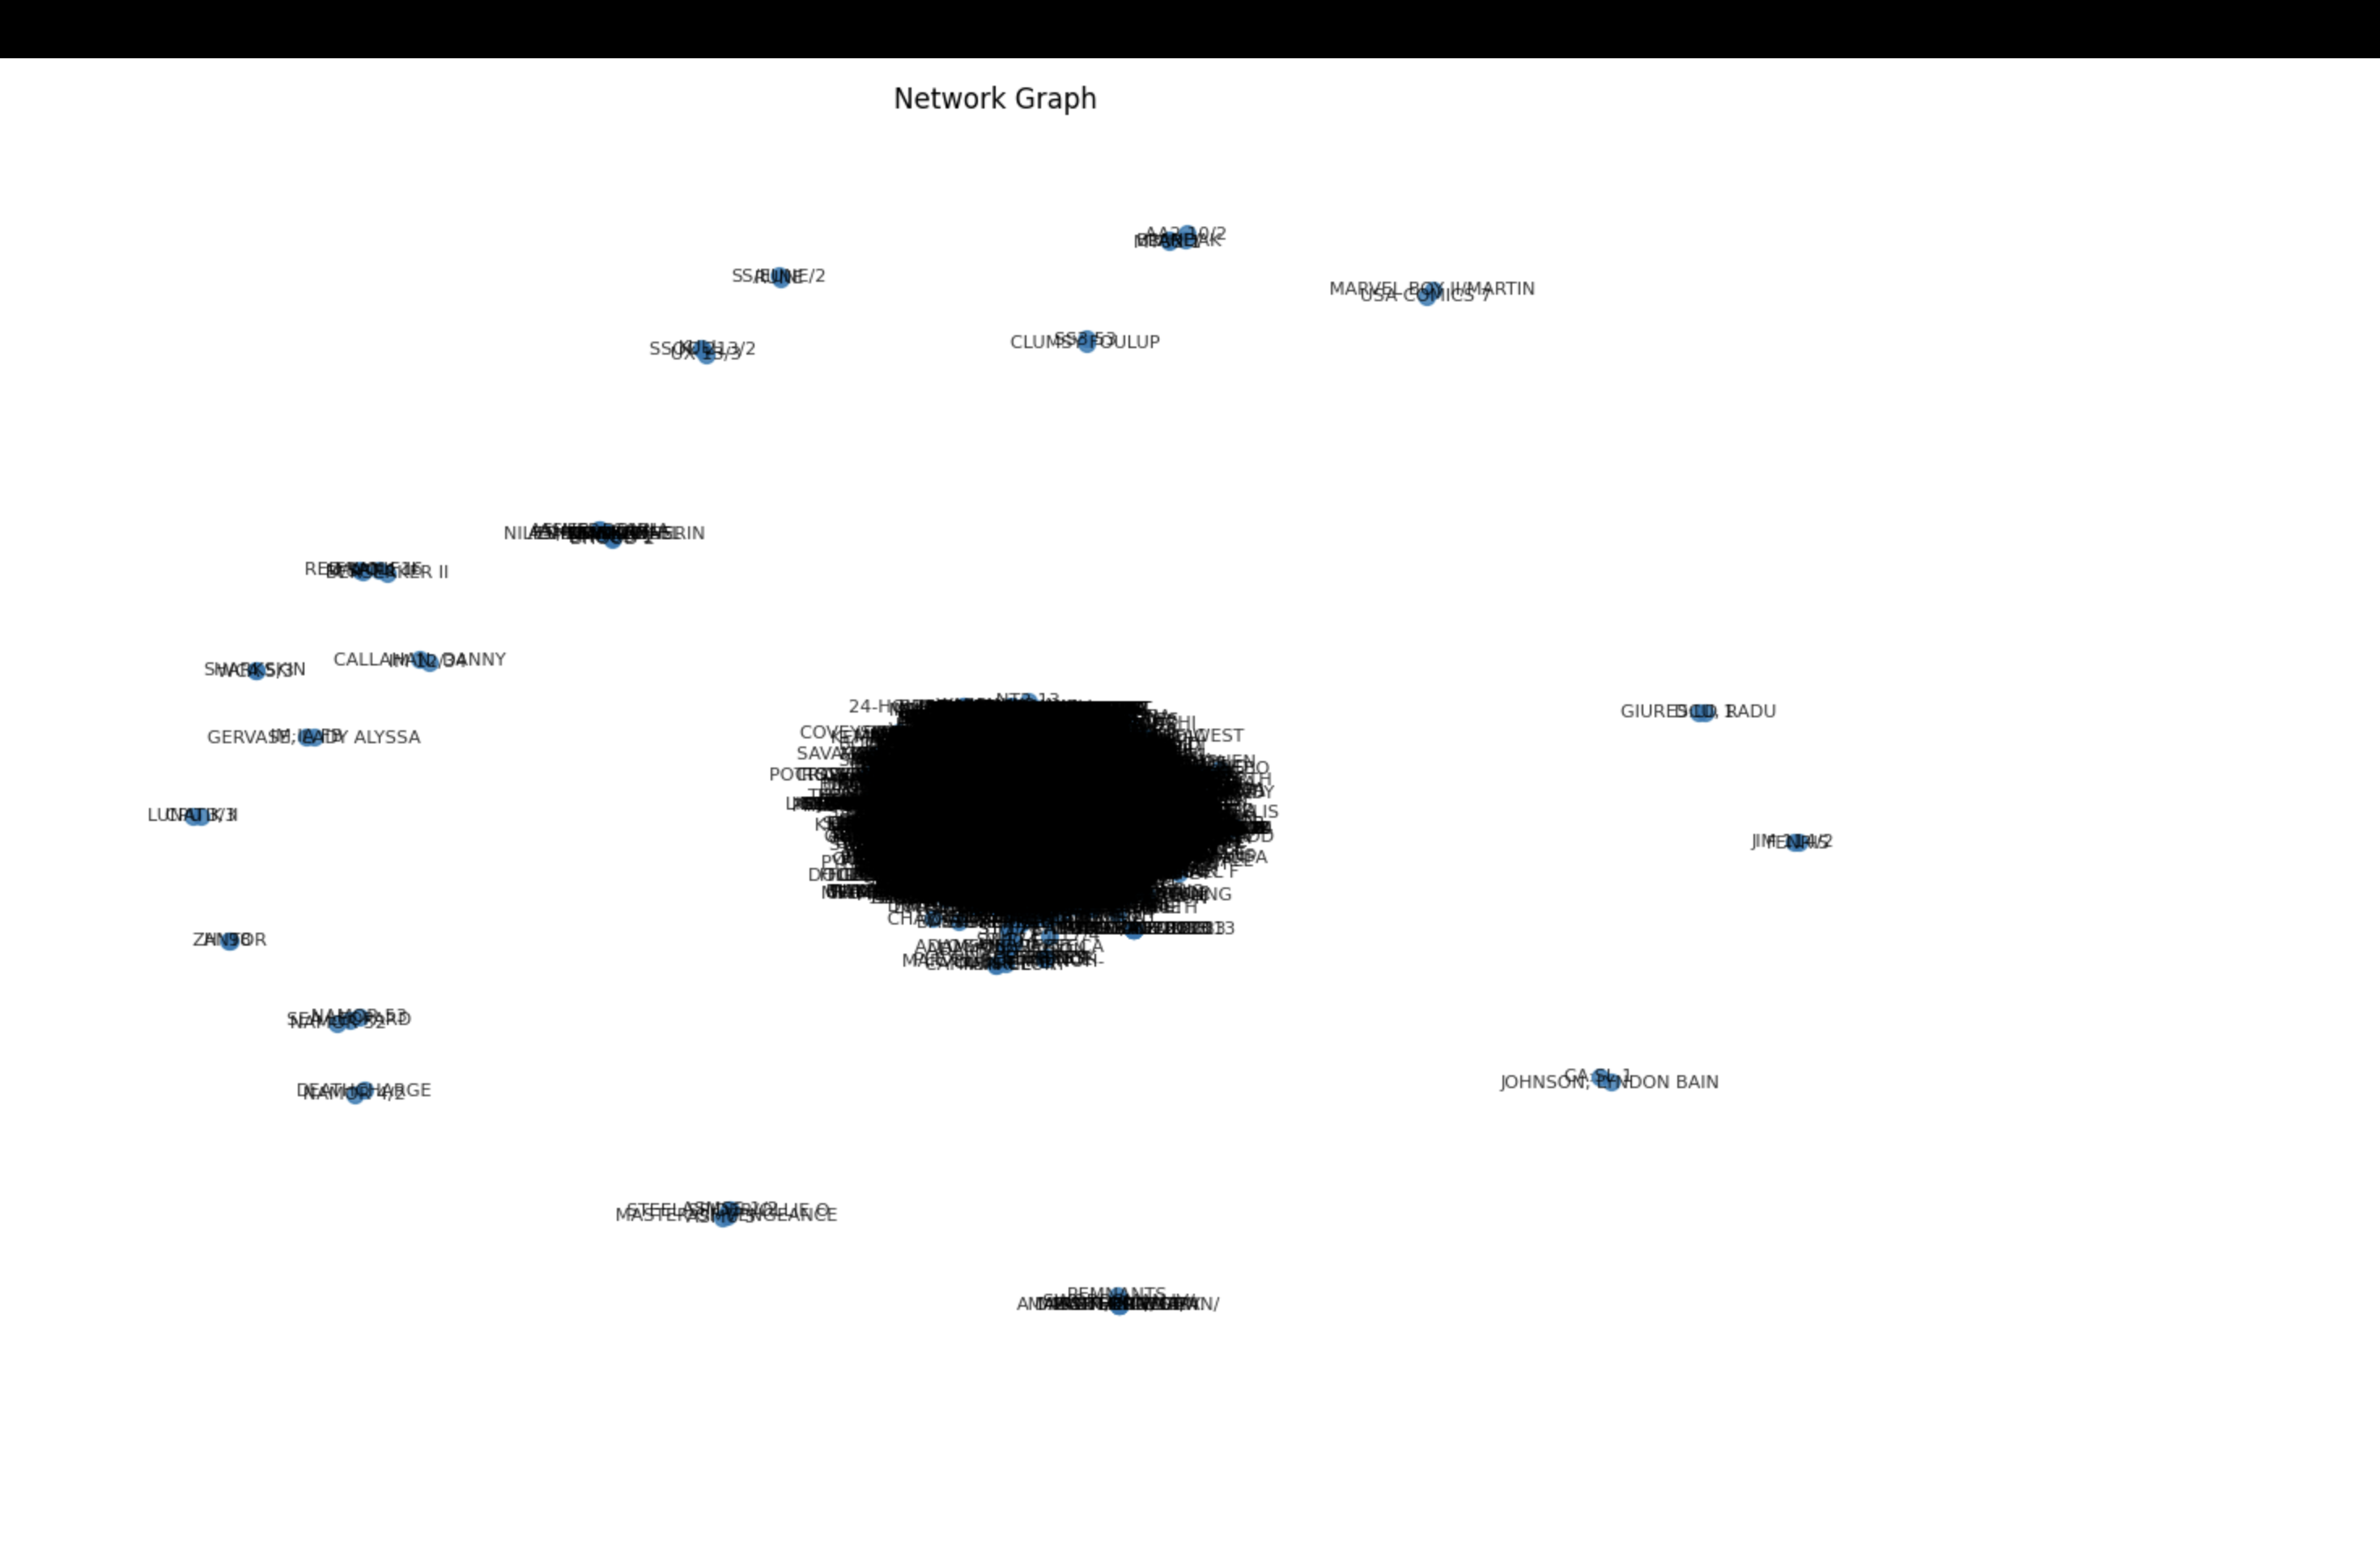

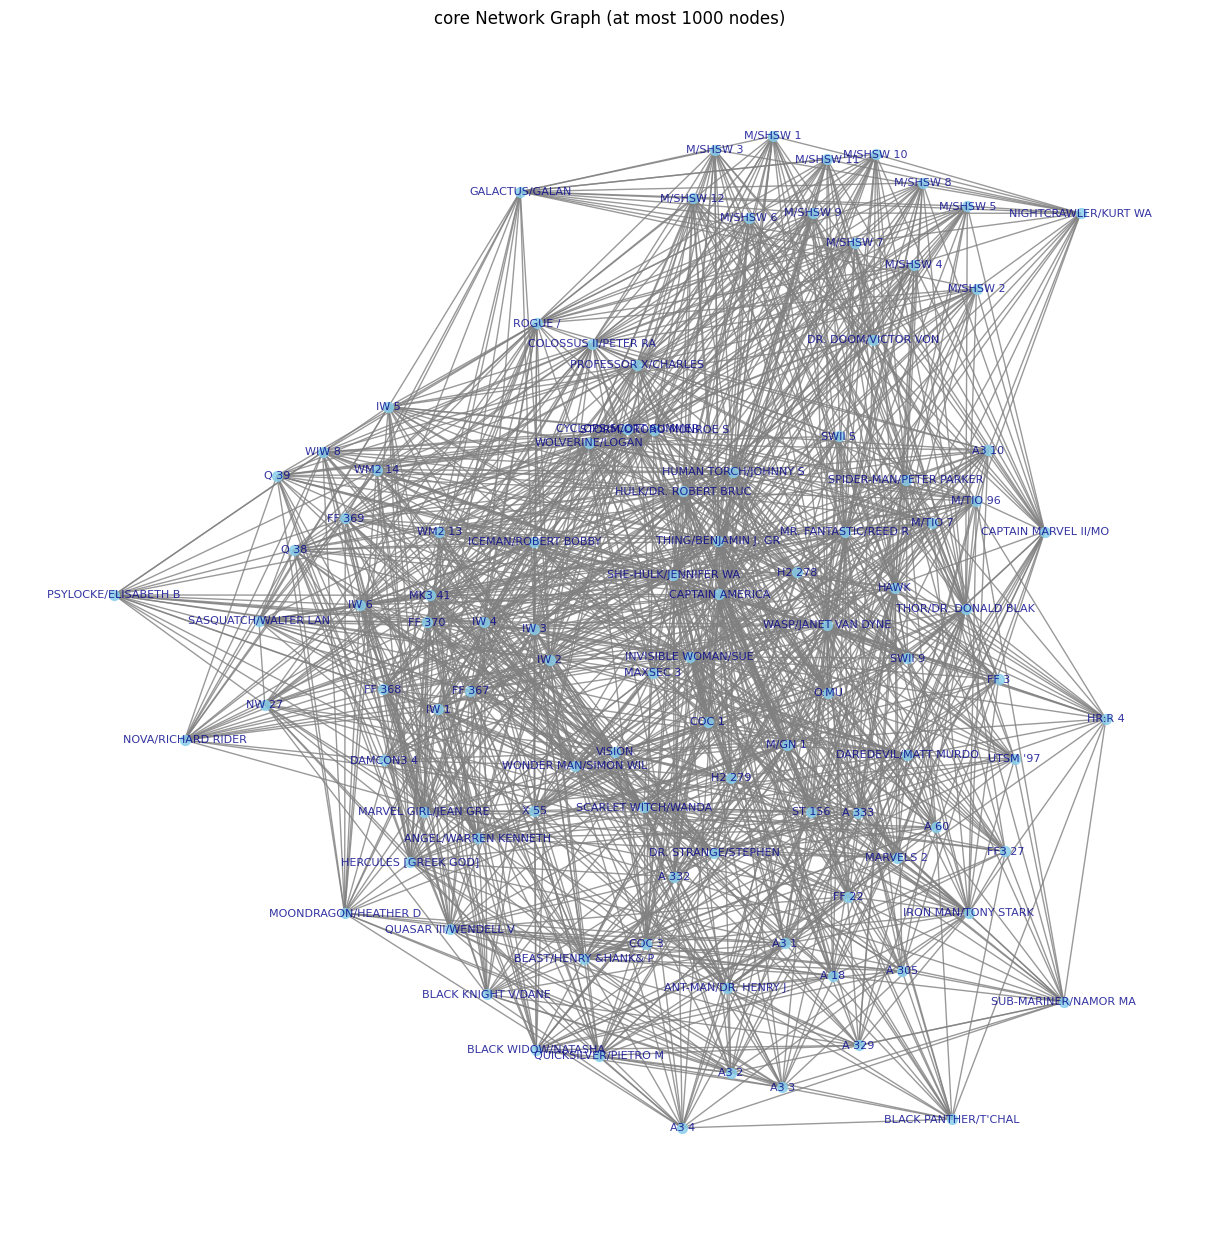

In [ ]:
#✅ The graph above is not clear and not visible
# so I decided to limit the numbers of nodes to 1000 and implement some changes to reach better visualization.
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
#First I loaded the edges data
# Step 1: Load the edges data
edges_path = f"{dataset_folder}/edges.csv"
nodes_path = f"{dataset_folder}/nodes.csv"
hero_network_path = f"{dataset_folder}/heronetwork.csv"
hero_network_df = pd.read_csv(f"{dataset_folder}/hero-network.csv")
nodes_df = pd.read_csv(f"{dataset_folder}/nodes.csv")
edges_df = pd.read_csv(f"{dataset_folder}/edges.csv")
# Step 2: create a graph from the edges data
G = nx.from_pandas_edgelist(edges_df, source="hero", target="comic")
# Step 3: extracting the k-core of the graph
k_core = nx.k_core(G)
# Step 4: Limiting the nodes to at most 1000 nodes
if len(k_core.nodes) > 1000:
    core_nodes = list(k_core.nodes)[:1000]
    G_core = G.subgraph(core_nodes)
else:
    G_core = k_core
# Step 5:Plotting the core graph
plt.figure(figsize=(12,12))
# I used the spring layout for better visualization
pos = nx.spring_layout(G_core, seed=42)
nx.draw(
    G_core,
    pos,
    with_labels=True,
    node_size=50,
    font_size=8,
    node_color='skyblue',
    edge_color='gray',
    alpha=0.8,
    font_color='darkblue', # change the font color for better readability.
)
plt.title("core Network Graph (at most 1000 nodes)")
plt.show()
# Then, we have better visualization and we can understand more about the structure of this graph

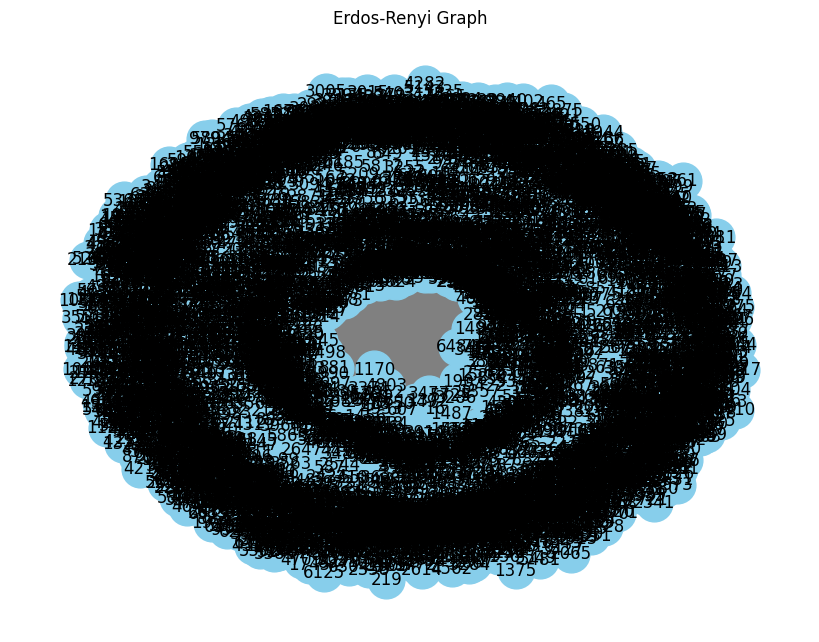

In [ ]:
#✅For Erdos-Renyi

# I tried to import needed libraries
import networkx as nx
import matplotlib.pyplot as plt

# the numbers of nudes supposed to be a same as my choosed dataset
# I tried to plot Erdos-Renyi with 6486 nodes
def create_erdos_renyi_graph(num_nodes=6486, probability=0.139):
    G = nx.erdos_renyi_graph(num_nodes, probability)
    return G

#let's visualize that
def visualize_network(G, title):
    plt.figure(figsize=(8,6))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=700, edge_color='gray', linewidths=1, font_size=12)
    plt.title(title)
    plt.show()
if __name__ == "__main__":
    num_nodes = 6486
    probability = 0.139
    erdos_graph = create_erdos_renyi_graph(num_nodes, probability)
    visualize_network(erdos_graph, "Erdos-Renyi Graph")



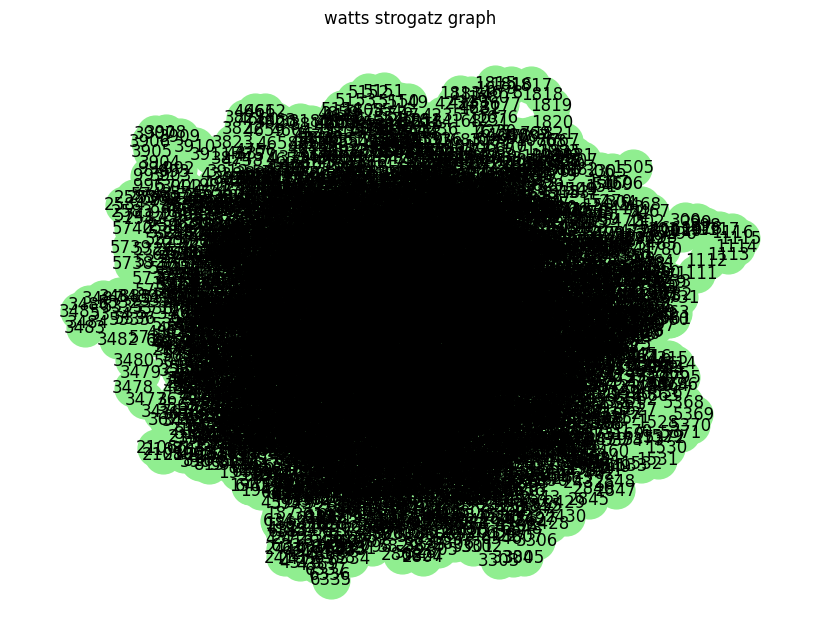

In [ ]:
#✅For Watts-Strogatz

# I tried to import needed libraries
import networkx as nx
import matplotlib.pyplot as plt
# I tried to plot Watts-Strogatz with 6486 nodes
# the numbers of nudes supposed to be a same as my choosed dataset
def create_watts_strogatz_graph(num_nodes=6486, k=4, probability=0.1):
    G = nx.watts_strogatz_graph(num_nodes, k, probability)
    return G
#let's visualize that
def visualize_network(G, title):
    plt.figure(figsize=(8,6))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=700, edge_color='gray', linewidths=1, font_size=12)
    plt.title(title)
    plt.show()
if __name__ == "__main__":
    num_nodes = 6486
    k = 4
    probability = 0.1
    watts_graph = create_watts_strogatz_graph(num_nodes, k,  probability)
    visualize_network(watts_graph, "watts strogatz graph")


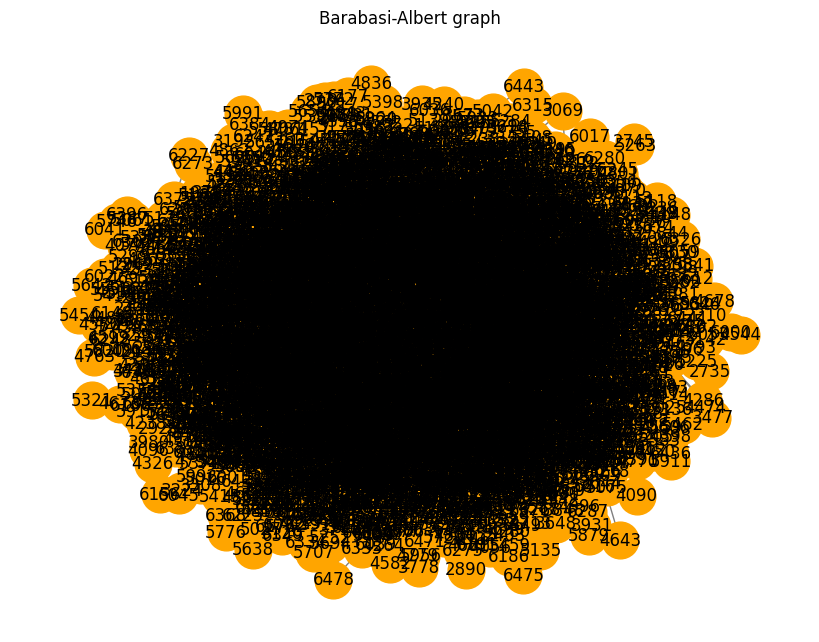

In [ ]:
#✅For Barabasi-Albert

# I tried to import needed libraries
import networkx as nx
import matplotlib.pyplot as plt
# I tried to plot Barabasi-Albert with 6486 nodes
# the numbers of nudes supposed to be a same as my choosed dataset
def create_barabasi_albert_graph(num_nodes=6486, m=2):
    G = nx.barabasi_albert_graph(num_nodes, m)
    return G
#let's visualize that
def visualize_network(G, title):
    plt.figure(figsize=(8,6))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='orange', node_size=700, edge_color='gray', linewidths=1, font_size=12)
    plt.title(title)
    plt.show()
if __name__ == "__main__":
    num_nodes = 6486
    m = 2
    barabasi_albert = create_barabasi_albert_graph(num_nodes, m)
    visualize_network(barabasi_albert, "Barabasi-Albert graph")



# **Step 3:**
# ***Perform Network Analysis***

I tried to implement the required analysis .

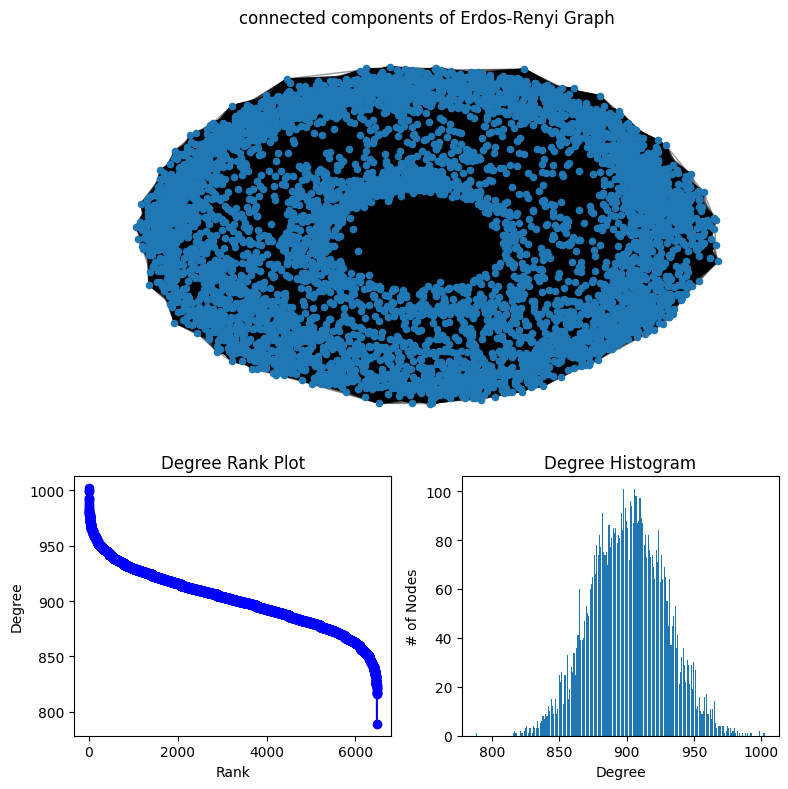

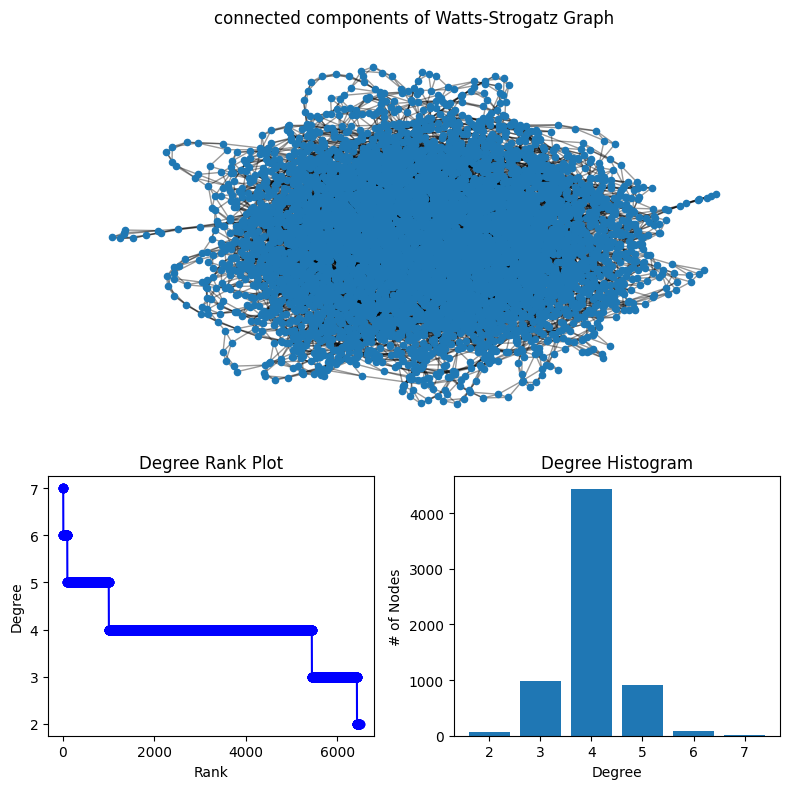

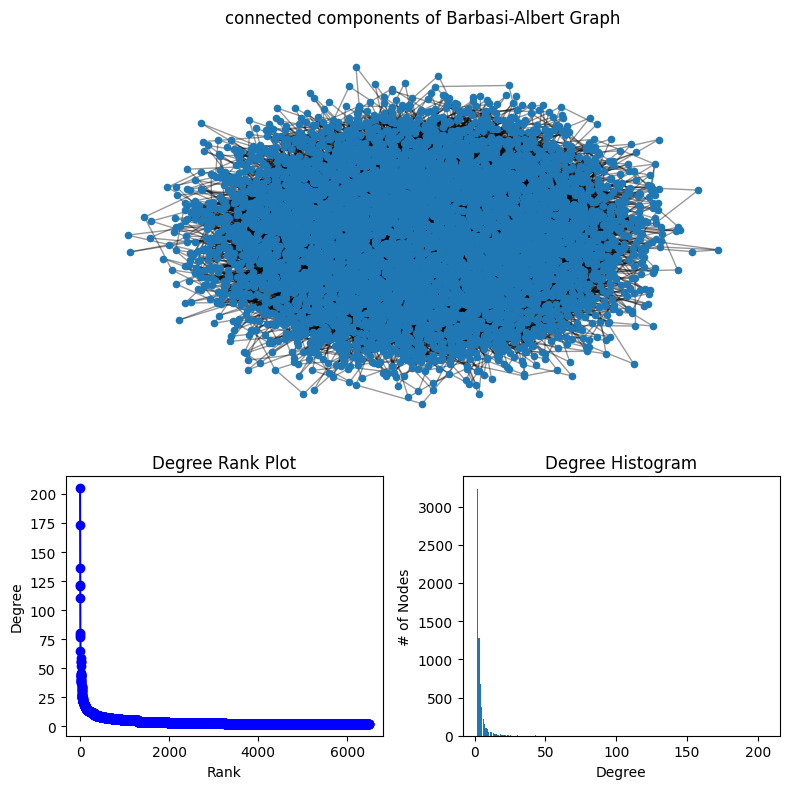

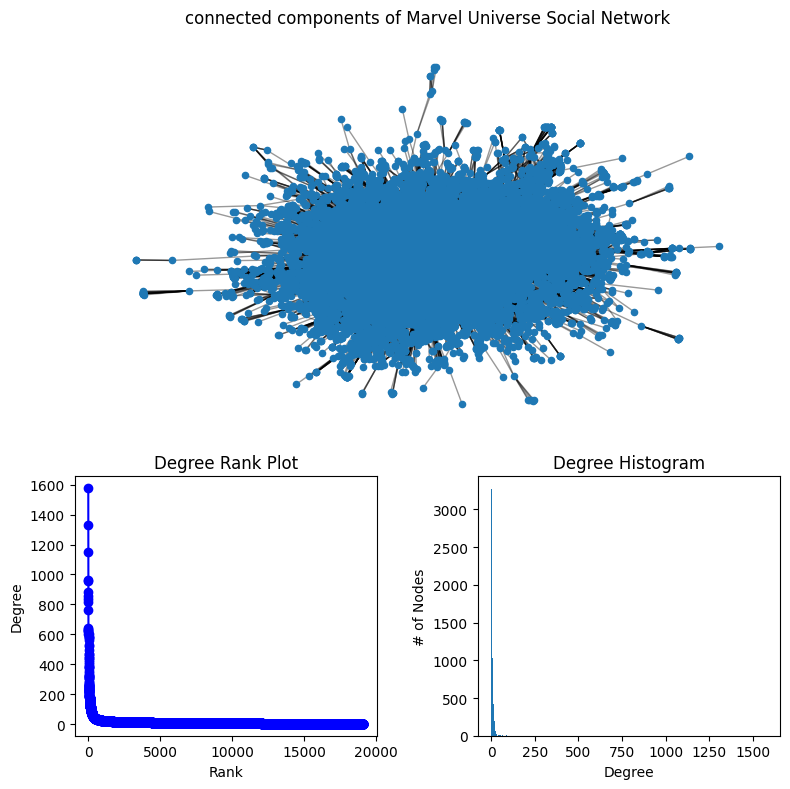

In [ ]:
#⏰⏰❇️✅Degree Analysis⏰⏰❇️✅
#This code is belong to Degree Analysis for our 4 graphs including Erdos-Renyi, Watts-Strogatz, Barabasi-Albert and Marvel Universe Social Network.
#First I have to import the libraries
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#I wanted to plot 4 geraph: Connected components, Degree Rank Plot, Degree Histogram.
def degree_analysis(G, title="Graph"):
    degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
    fig = plt.figure(figsize=(8,8))
    axgrid = fig.add_gridspec(5, 4)
#Now we want to show the graph
    ax0 = fig.add_subplot(axgrid[0:3, :])
#For disconnected graphs we choose the largest connected component
    Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
    pos = nx.spring_layout(Gcc)
    nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
    nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4 )
    ax0.set_title(f"connected components of {title}")
    ax0.set_axis_off()

#For Ploting the Degree Rank
    ax1 = fig.add_subplot(axgrid[3:, :2])
    ax1.plot(degree_sequence, "b-", marker="o")
    ax1.set_title("Degree Rank Plot")
    ax1.set_ylabel("Degree")
    ax1.set_xlabel("Rank")

#For Degree Histogram
    ax2=fig.add_subplot(axgrid[3:, 2:])
    ax2.bar(*np.unique(degree_sequence, return_counts=True))
    ax2.set_title("Degree Histogram")
    ax2.set_xlabel("Degree")
    ax2.set_ylabel("# of Nodes")
    fig.tight_layout()
    plt.show()

#For creating that three synthetic graphs
num_nodes = 6486
probability = 0.139
ER_G = nx.erdos_renyi_graph(num_nodes, probability)
WS_G = nx.watts_strogatz_graph(num_nodes, 4, 0.1)
BA_G = nx.barabasi_albert_graph(num_nodes, 2)
#I tried to load the Marvel Universe Social Network which is my main dataset
#I defined the folder/path where my Marvel dataset is located
dataset_folder = "/root/.cache/kagglehub/datasets/csanhueza/the-marvel-universe-social-network/versions/1"
marvel_edges_path = f"{dataset_folder}/edges.csv"
#For reading the CSV file
edges = pd.read_csv(marvel_edges_path)
#Let's create the Marvel graph with column names 'hero' and 'comic'.
Marvel_G = nx.from_pandas_edgelist(edges, source='hero', target='comic')
#Then,we take part in degree analysis for all of our graphs
degree_analysis(ER_G, "Erdos-Renyi Graph")
degree_analysis(WS_G, "Watts-Strogatz Graph")
degree_analysis(BA_G, "Barbasi-Albert Graph")
degree_analysis(Marvel_G, "Marvel Universe Social Network")



# ***The Result of this part:***

we have ploted and analysed these graphs together and as you can see, our graph is similar to ***the Barabasi graph***. Our Graph as also follows ***power-law*** and it confirm this similarity.

In [ ]:
#✅For average clustering
#I tried to create three synthetic graphs which are Erdos renyi, Watts strogatz and Barbasi albert
#I would like to compare them with my chosen dataset and see the result.
# the numbers of nudes supposed to be a same as my choosed dataset
#I tried to import related libraries:
from itertools import combinations
from networkx.algorithms import approximation
import networkx as nx
import pandas as pd
#I tried to create three graphs with 6486 nodes.
num_nodes = 6486
probability = 0.139
ER_G = nx.erdos_renyi_graph(num_nodes, probability)
WS_G = nx.watts_strogatz_graph(num_nodes, 4, 0.1)
BA_G = nx.barabasi_albert_graph(num_nodes,2)

#I tried to load the Marvel Universe Social Network which is my main dataset
#I defined the folder/path where my Marvel dataset is located
dataset_folder = "/root/.cache/kagglehub/datasets/csanhueza/the-marvel-universe-social-network/versions/1"
marvel_edges_path = f"{dataset_folder}/edges.csv"
#For reading the CSV file
edges = pd.read_csv(marvel_edges_path)
#Let's create new graph for Marvel
Marvel_G = nx.Graph()
#I tried to Group heroes by comic
comics = edges.groupby("comic")["hero"].apply(list)
#Then connecting the heroes who appeared in the same comic
for heroes in comics:
    for hero1, hero2 in combinations(heroes, 2):
        Marvel_G.add_edge(hero1, hero2)
#let's calculate the average clustering for each graph
ER_clustering = approximation.average_clustering(ER_G, trials=6486)
WS_clustering = approximation.average_clustering(WS_G, trials=6486)
BA_clustering = approximation.average_clustering(BA_G, trials=6486)
Marvel_clustering = approximation.average_clustering(Marvel_G, trials=6486)
#Now we can see the result
print("Erdos-renyi Average Clustering:", ER_clustering)
print("Watts-Strogatz Average Clustering:", WS_clustering)
print("Barbasi-Albert Average Clustering:", BA_clustering)
print("Marvel Universe Social Network Average Clustering:", Marvel_clustering)


Erdos-renyi Average Clustering: 0.13382670366944188
Watts-Strogatz Average Clustering: 0.368331791551033
Barbasi-Albert Average Clustering: 0.005087881591119334
Marvel Universe Social Network Average Clustering: 0.7719703977798335


In [ ]:
#⏰⏰❇️✅This tooks 53 minutes!!!!⏰⏰❇️✅
#For Diameter calulation
#I tried to import libraries
import networkx as nx
import pandas as pd
#I tried to create three graphs with 6486 nodes.
# the numbers of nudes supposed to be a same as my choosed dataset
num_nodes = 6486
probability = 0.139
ER_G = nx.erdos_renyi_graph(num_nodes, probability)
WS_G = nx.watts_strogatz_graph(num_nodes, 4, 0.1)
BA_G = nx.barabasi_albert_graph(num_nodes,2)
#I tried to load the Marvel Universe Social Network which is my main dataset
#I defined the folder/path where my Marvel dataset is located
dataset_folder = "/root/.cache/kagglehub/datasets/csanhueza/the-marvel-universe-social-network/versions/1"
marvel_edges_path = f"{dataset_folder}/edges.csv"
#For reading the CSV file
edges = pd.read_csv(marvel_edges_path)
#Let's create the Marvel graph with column names 'hero' and 'comic'.
Marvel_G = nx.from_pandas_edgelist(edges, source='hero', target='comic')
#Let's Define function for diameter calculation
def compute_diameter(G):
    if nx.is_connected(G):
        return nx.diameter(G)
    else:
        largest_cc = max(nx.connected_components(G), key=len)
        subgraph = G.subgraph(largest_cc)
        return nx.diameter(subgraph)
#Now I am trying to calculate diameters for each graph
ER_diameter = compute_diameter(ER_G)
WS_diameter = compute_diameter(WS_G)
BA_diameter = compute_diameter(BA_G)
Marvel_diameter = compute_diameter(Marvel_G)
#We can see the result righ now
print("Erdos-renyi Average Clustering:", ER_diameter)
print("Watts-Strogatz Average Clustering:", WS_diameter)
print("Barbasi-Albert Average Clustering:", BA_diameter)
print("Marvel Universe Social Network Average Clustering:", Marvel_diameter)


Erdos-renyi Average Clustering: 2
Watts-Strogatz Average Clustering: 18
Barbasi-Albert Average Clustering: 7
Marvel Universe Social Network Average Clustering: 11


## ***Centrality Analysis***


I tried to identify influential node and measures

eigenvector, pagerank, closeness centrality, harmonic function and betwenness.


In [ ]:
#✅For eigenvector_centrality
#First I try to import different libraries.
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
#This is the function to compute and print eigenvector centrality
def compute_eigenvector_centrality(G, graph_name):
    try:
        eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000, tol=1e-6)
        eigenvector_df = pd.DataFrame(eigenvector_centrality.items(), columns=['Node', 'Eigenvector Centrality'])
        print(f"\nEigenvector Centrality for {graph_name}:")
        print(eigenvector_df.head())
    except nx.PowerIterationFailedConvergence:
        print(f"Eigenvector centrality did not coverge for {graph_name}:")
#I tried to create random graph based on our main graphs with 6486 nodes:
G_er = nx.erdos_renyi_graph(6486, 0.05)
compute_eigenvector_centrality(G_er, "Erdos-Renyi")
G_ws = nx.watts_strogatz_graph(6486, 4, 0.1)
compute_eigenvector_centrality(G_ws, "Watts-Strogatz")
G_ba = nx.barabasi_albert_graph(6486, 3)
compute_eigenvector_centrality(G_ba, "Barbasi-Albert")
#I tried to load the Marvel Universe Social Network which is my main dataset
#I defined the folder/path where my Marvel dataset is located
dataset_folder = "/root/.cache/kagglehub/datasets/csanhueza/the-marvel-universe-social-network/versions/1"
marvel_edges_path = f"{dataset_folder}/edges.csv"
#For reading the CSV file
edges = pd.read_csv(marvel_edges_path)
#Let's create the Marvel graph with column names 'hero' and 'comic'.
G_Marvel = nx.from_pandas_edgelist(edges, source='hero', target='comic')
compute_eigenvector_centrality(G_Marvel,"The Marvel Universe Social Network")



Eigenvector Centrality for Erdos-Renyi:
   Node  Eigenvector Centrality
0     0                0.013095
1     1                0.013553
2     2                0.013467
3     3                0.012204
4     4                0.012262

Eigenvector Centrality for Watts-Strogatz:
   Node  Eigenvector Centrality
0     0                0.010104
1     1                0.010648
2     2                0.005398
3     3                0.012592
4     4                0.010005

Eigenvector Centrality for Barbasi-Albert:
   Node  Eigenvector Centrality
0     0                0.246265
1     1                0.159548
2     2                0.243000
3     3                0.050119
4     4                0.186882

Eigenvector Centrality for The Marvel Universe Social Network:
                   Node  Eigenvector Centrality
0  24-HOUR MAN/EMMANUEL            2.979197e-07
1                AA2 35            2.061432e-05
2  3-D MAN/CHARLES CHAN            1.180350e-03
3                 AVF 4            9.25

In [ ]:
#✅For Pagerank
#I tried to import the libraries
import networkx as nx
import pandas as pd
#I tried to create random graph based on our main graphs with 6486 nodes:
# the numbers of nudes supposed to be a same as my choosed dataset
num_nodes = 6486
probability = 0.139
ER_G = nx.erdos_renyi_graph(num_nodes, probability)
WS_G = nx.watts_strogatz_graph(num_nodes, 4, 0.1)
BA_G = nx.barabasi_albert_graph(num_nodes, 2)
#I tried to write down a function to compute and display PageRank
def compute_pagerank(G, graph_name):
    pr = nx.pagerank(G, alpha=0.9)
    sorted_pr = sorted((v, f"{c:.4f}") for v, c in pr.items())
    print(f"{graph_name} PageRank:")
    print(sorted_pr)
    print("-" * 40)
#Let's compute and print PageRank for all graphs
compute_pagerank(ER_G, "Erdos-Renyi")
compute_pagerank(WS_G, "Watts-Strogatz")
compute_pagerank(BA_G, "Barabasi-Albert")
#Let's load the Marvel Universe dataset
dataset_folder = "/root/.cache/kagglehub/datasets/csanhueza/the-marvel-universe-social-network/versions/1"
marvel_edges_path = f"{dataset_folder}/edges.csv"
#For reading the CSV file
edges = pd.read_csv(marvel_edges_path)
#Let's create the Marvel graph with column names 'hero' and 'comic'.
G_Marvel = nx.from_pandas_edgelist(edges, source='hero', target='comic')
compute_pagerank(G_Marvel, "the Marvel Universe Network")


Erdos-Renyi PageRank:
[(0, '0.0002'), (1, '0.0002'), (2, '0.0002'), (3, '0.0002'), (4, '0.0002'), (5, '0.0002'), (6, '0.0002'), (7, '0.0002'), (8, '0.0002'), (9, '0.0002'), (10, '0.0002'), (11, '0.0002'), (12, '0.0002'), (13, '0.0002'), (14, '0.0002'), (15, '0.0002'), (16, '0.0002'), (17, '0.0002'), (18, '0.0001'), (19, '0.0002'), (20, '0.0002'), (21, '0.0002'), (22, '0.0002'), (23, '0.0001'), (24, '0.0002'), (25, '0.0002'), (26, '0.0002'), (27, '0.0002'), (28, '0.0002'), (29, '0.0001'), (30, '0.0002'), (31, '0.0001'), (32, '0.0002'), (33, '0.0002'), (34, '0.0002'), (35, '0.0002'), (36, '0.0002'), (37, '0.0002'), (38, '0.0002'), (39, '0.0002'), (40, '0.0002'), (41, '0.0001'), (42, '0.0001'), (43, '0.0002'), (44, '0.0002'), (45, '0.0002'), (46, '0.0002'), (47, '0.0002'), (48, '0.0002'), (49, '0.0002'), (50, '0.0001'), (51, '0.0002'), (52, '0.0001'), (53, '0.0001'), (54, '0.0001'), (55, '0.0002'), (56, '0.0002'), (57, '0.0002'), (58, '0.0002'), (59, '0.0002'), (60, '0.0002'), (61, '0.000

# The Result from PageRank:

because of some dominant nodes we maybe can say the Marvel Universe Network PageRank is somehow ***similar to Barabasi-Albert PageRank.***

In [ ]:
#✅For closeness centrality
#I tried to import the libraries
import networkx as nx
import pandas as pd
#I tried to create random graph based on our main graphs with 6486 nodes:
# the numbers of nudes supposed to be a same as my choosed dataset
num_nodes = 6486
probability = 0.139
ER_G = nx.erdos_renyi_graph(num_nodes, probability)
WS_G = nx.watts_strogatz_graph(num_nodes, 4, 0.1)
BA_G = nx.barabasi_albert_graph(num_nodes, 2)
#I tried to write down a function to compute and display PageRank
def compute_closeness(G, graph_name):
    closeness = nx.closeness_centrality(G)
    sorted_closeness = sorted((v, f"{c:.4f}") for v, c in closeness.items())
    print(f"{graph_name} Closeness Centrality:")
    print(sorted_closeness)
    print("-" * 40)
#Let's compute and print closeness for all graphs
compute_closeness(ER_G, "Erdos-Renyi")
compute_closeness(WS_G, "Watts-Strogatz")
compute_closeness(BA_G, "Barabasi-Albert")
#Let's load the Marvel Universe dataset
dataset_folder = "/root/.cache/kagglehub/datasets/csanhueza/the-marvel-universe-social-network/versions/1"
marvel_edges_path = f"{dataset_folder}/edges.csv"
#For reading the CSV file
edges = pd.read_csv(marvel_edges_path)
#Let's create the Marvel graph with column names 'hero' and 'comic'.
G_Marvel = nx.from_pandas_edgelist(edges, source='hero', target='comic')
compute_closeness(G_Marvel, "the Marvel Universe Network")



Erdos-Renyi Closeness Centrality:
[(0, '0.5348'), (1, '0.5379'), (2, '0.5360'), (3, '0.5360'), (4, '0.5381'), (5, '0.5392'), (6, '0.5384'), (7, '0.5352'), (8, '0.5371'), (9, '0.5366'), (10, '0.5376'), (11, '0.5386'), (12, '0.5364'), (13, '0.5383'), (14, '0.5375'), (15, '0.5381'), (16, '0.5376'), (17, '0.5376'), (18, '0.5366'), (19, '0.5365'), (20, '0.5363'), (21, '0.5388'), (22, '0.5375'), (23, '0.5376'), (24, '0.5352'), (25, '0.5378'), (26, '0.5369'), (27, '0.5369'), (28, '0.5402'), (29, '0.5356'), (30, '0.5375'), (31, '0.5366'), (32, '0.5409'), (33, '0.5377'), (34, '0.5394'), (35, '0.5383'), (36, '0.5343'), (37, '0.5383'), (38, '0.5368'), (39, '0.5395'), (40, '0.5406'), (41, '0.5380'), (42, '0.5373'), (43, '0.5365'), (44, '0.5369'), (45, '0.5360'), (46, '0.5377'), (47, '0.5381'), (48, '0.5380'), (49, '0.5368'), (50, '0.5360'), (51, '0.5360'), (52, '0.5380'), (53, '0.5371'), (54, '0.5353'), (55, '0.5355'), (56, '0.5388'), (57, '0.5380'), (58, '0.5374'), (59, '0.5386'), (60, '0.5391'),

In [ ]:
#✅For harmonic_function
#I tried to import the libraries
import networkx as nx
import pandas as pd
from networkx.algorithms import node_classification
#I tried to create random graph based on our main graphs with 6486 nodes:
# the numbers of nudes supposed to be a same as my choosed dataset
num_nodes = 6486
probability = 0.139
ER_G = nx.erdos_renyi_graph(num_nodes, probability)
WS_G = nx.watts_strogatz_graph(num_nodes, 4, 0.1)
BA_G = nx.barabasi_albert_graph(num_nodes, 2)
#I tried to write down a function to compute and display PageRank
def assign_labels(G):
    nodes = list(G.nodes())
    if len(nodes) < 2:
        return False  # Skip if not enough nodes

# I assigned the labels to two random nodes
    G.nodes[nodes[0]]["label"] = "A"
    G.nodes[nodes[-1]]["label"] = "B"
    return True
# Function to apply harmonic function classification
def harmonic_classification(G, graph_name):
    if assign_labels(G):  # Ensuring at least two labeled nodes
        predicted = node_classification.harmonic_function(G)
        print(f"{graph_name} Harmonic Function Classification:")
        print(predicted)
        print("-" * 40)

#Let's compute and print armonic classification for all graphs
harmonic_classification(ER_G, "Erdos-Renyi")
harmonic_classification(WS_G, "Watts-Strogatz")
harmonic_classification(BA_G, "Barabasi-Albert")
#Let's load the Marvel Universe dataset
dataset_folder = "/root/.cache/kagglehub/datasets/csanhueza/the-marvel-universe-social-network/versions/1"
marvel_edges_path = f"{dataset_folder}/edges.csv"
#For reading the CSV file
edges = pd.read_csv(marvel_edges_path)
#Let's create the Marvel graph with column names 'hero' and 'comic'.
G_Marvel = nx.from_pandas_edgelist(edges, source='hero', target='comic')
harmonic_classification(G_Marvel, "the Marvel Universe Network")


Erdos-Renyi Harmonic Function Classification:
['A', 'B', 'B', 'B', 'B', 'B', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'A', 'B', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'A', 'B', 'B', 'B', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'A', 'B', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'A', 'A', 'B', 'B', 'B', 'B', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'A', 'B', 'B', 'B', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'A', 'B', 'B', 'B'

In [ ]:
#✅For Betwenness
#I tried to import some libraries
import networkx as nx
import pandas as pd
# I tried to Load Marvel Universe Social Network data
edges_path = f"{dataset_folder}/edges.csv"
nodes_path = f"{dataset_folder}/nodes.csv"
edges_df = pd.read_csv(edges_path)
nodes_df = pd.read_csv(nodes_path)
#Now lets create Marvel Universe graph
MU_G = nx.Graph()
MU_G.add_edges_from(edges_df.values)
#I tried to create random graph based on our main graphs with 6486 nodes:
# the numbers of nudes supposed to be a same as my choosed dataset
num_nodes = 6486
probability = 0.139
ER_G = nx.erdos_renyi_graph(num_nodes, probability)
WS_G = nx.watts_strogatz_graph(num_nodes, 4, 0.1)
BA_G = nx.barabasi_albert_graph(num_nodes, 2)
#I tried to write down the function to compute and display betweenness centrality
def compute_betweenneess(G, graph_name):
    centrality = nx.betweenness_centrality(G, k=10, endpoints=True)
    sorted_centrality = sorted((v, f"{c:.4f}") for v, c in centrality.items())
    print(f"{graph_name} Betweenness Centrality:")
    print(sorted_centrality)
    print("-" * 40)
#Let's compute betweenness centrality for all of my graphs
compute_betweenneess(ER_G, "Erdos_Renyi")
compute_betweenneess(WS_G, "Watts-Strogatz")
compute_betweenneess(BA_G, "Barabasi-Albert")
compute_betweenneess(MU_G, "Marvel Universe")


Erdos_Renyi Betweenness Centrality:
[(0, '0.0002'), (1, '0.0005'), (2, '0.0002'), (3, '0.0002'), (4, '0.0002'), (5, '0.0002'), (6, '0.0004'), (7, '0.0002'), (8, '0.0003'), (9, '0.0002'), (10, '0.0002'), (11, '0.0002'), (12, '0.0003'), (13, '0.0003'), (14, '0.0002'), (15, '0.0003'), (16, '0.0005'), (17, '0.0002'), (18, '0.0002'), (19, '0.0002'), (20, '0.0003'), (21, '0.0004'), (22, '0.0003'), (23, '0.0003'), (24, '0.0004'), (25, '0.0004'), (26, '0.0003'), (27, '0.0004'), (28, '0.0002'), (29, '0.0002'), (30, '0.0002'), (31, '0.0004'), (32, '0.0003'), (33, '0.0003'), (34, '0.0003'), (35, '0.0002'), (36, '0.0003'), (37, '0.0002'), (38, '0.0003'), (39, '0.0003'), (40, '0.0003'), (41, '0.0004'), (42, '0.0002'), (43, '0.0002'), (44, '0.0004'), (45, '0.0003'), (46, '0.0002'), (47, '0.0004'), (48, '0.0003'), (49, '0.0002'), (50, '0.0002'), (51, '0.0004'), (52, '0.0002'), (53, '0.0002'), (54, '0.0004'), (55, '0.0003'), (56, '0.0002'), (57, '0.0002'), (58, '0.0004'), (59, '0.0004'), (60, '0.0003'

In [ ]:
# In this part:(session 8)
# 1-I calculating the highest value
# 2-Calculate network resilience
# 3-community detection using the Louvain method
#I tried to import some libraries
import networkx as nx
import pandas as pd
import random
#I also import community for community detection (using Louvain Method)
import community as community_louvain
# I tried to Load Marvel Universe Social Network data
#Let's load the Marvel Universe dataset
dataset_folder = "/root/.cache/kagglehub/datasets/csanhueza/the-marvel-universe-social-network/versions/1"
edges_path = f"{dataset_folder}/edges.csv"
nodes_path = f"{dataset_folder}/nodes.csv"
edges_df = pd.read_csv(edges_path)
nodes_df = pd.read_csv(nodes_path)
#Now lets create Marvel Universe graph
#Let's create the Marvel graph with column names 'hero' and 'comic'.
MU_G = nx.from_pandas_edgelist(edges_df, source='hero', target='comic')
#I tried to create random graph based on our main graphs with 6486 nodes:
num_nodes = 6486
#I always use 0.139 as probability but if I plot with this number the result would be not good for erdos renyi so I choose 0.2 for this purpose
probability = 0.2
#I add this line for watts strogatz to balancing clustering and have better links to have a better result whenever it is plotted
rewire_prob = 0.2
ER_G = nx.erdos_renyi_graph(num_nodes, probability)
WS_G = nx.watts_strogatz_graph(num_nodes, 4, rewire_prob)
BA_G = nx.barabasi_albert_graph(num_nodes, 2)
# lets use function to generate network and then try to calculate the highest value
def generate_networks():
    return [("Erdos-Renyi", ER_G),
            ("watts-strogatz", WS_G),
            ("barabasi-albert", BA_G),
            ("Marvel universe", MU_G)]
#let's calculate metrics for each graph
def analyze_networks():
  networks = generate_networks()
  for name, graph in networks:
      print(f"\nAnalyzing {name} Graph:")
     #lets calculate the highest degree:
      degree = dict(graph.degree())
      if degree:
          highest_degree_node = max(degree, key=degree.get)
          highest_degree_value = degree[highest_degree_node]
          print(f"Highest Degree Node: {highest_degree_node}")
          print(f"Highest Degree Value: {highest_degree_value}")
      else:
          print("Graph has no node")
  #let's try to Network Resilience or node connectivity
      try:
          connectivity = nx.node_connectivity(graph)
          print(f" - Network Resilience (Node connectivity): {connectivity}")
      except nx.NetworkXError as e:
          print(f" - Network Resilience (Node connectivity): could not be calculated ({str(e)}) ")
#let's calculate community detection using Louvain Method
      print(" - Community Detection (Louvain):")
      try:
          partition = community_louvain.best_partition(graph)
          communities = {comm:[] for comm in set(partition.values())}
          for node, comm in partition.items():
              communities[comm].append(node)
          for comm, nodes in communities.items():
              print(f" community {comm}: {len(nodes)} nodes")
      except Exception as e:
          print(f" could not calculate louvain partitioning ({str(e)})")
#Main block with sample size 1000, my laptop really not supporting this amounts of nodes
if __name__=="__main__":
  #I use a smaller sample for large graphs to improve performance
  sample_size = 1000
  if MU_G.number_of_nodes()>sample_size:
      sample_nodes = random.sample(list(MU_G.nodes()), sample_size)
      MU_G = MU_G.subgraph(sample_nodes)
  analyze_networks()




# *Analyzing Watts Strogatz Graph:*

Highest Degree node:2881

Highest Degree value: 4


# *Analyzing Barabasi Albert Graph:*

Highest Degree node:62

Highest Degree value: 10

Time for Network Resilience: 0.03 second


# *Analyzing Marvel Universe Graph:*

Highest Degree node:89

Highest Degree node: Spider man/Peter Parker

Highest Degree value: 5568











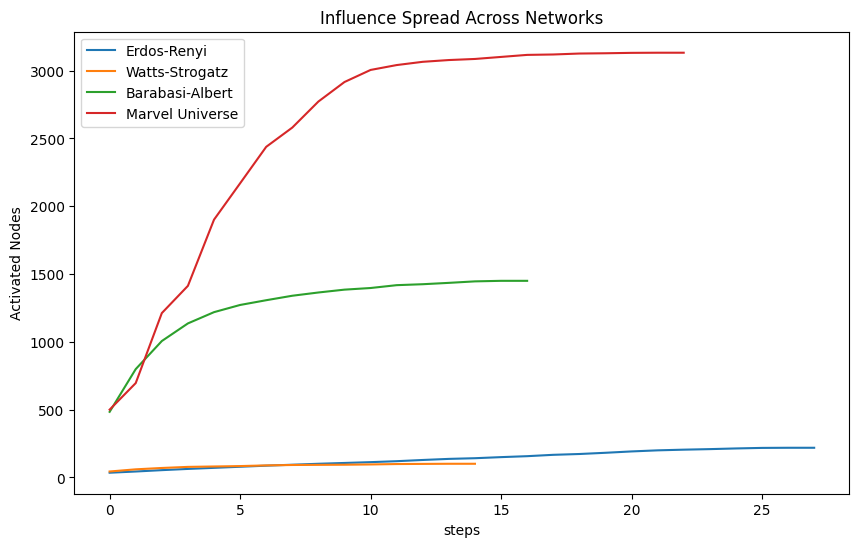

In [ ]:
# For model of influence(Finall Session)


# During the class we reached the conclusion that we have to just use linear threshold model
#There are many strategies which we could use for our project but I prefered to use top high clossness node strategy.
# I tried to use 20 nodes for that purpose.
#I tried to import some libraries
import networkx as nx
import pandas as pd
import random
#I also import matplotlib for ploting
import matplotlib.pyplot as plt
# I tried to Load Marvel Universe Social Network data
edges_path = f"{dataset_folder}/edges.csv"
nodes_path = f"{dataset_folder}/nodes.csv"
edges_df = pd.read_csv(edges_path)
nodes_df = pd.read_csv(nodes_path)
#Now lets create Marvel Universe graph
#Let's load the Marvel Universe dataset
dataset_folder = "/root/.cache/kagglehub/datasets/csanhueza/the-marvel-universe-social-network/versions/1"
marvel_edges_path = f"{dataset_folder}/edges.csv"
#For reading the CSV file
edges = pd.read_csv(marvel_edges_path)
#Let's create the Marvel graph with column names 'hero' and 'comic'.
MU_G = nx.from_pandas_edgelist(edges, source='hero', target='comic')
MU_G = nx.Graph()
MU_G.add_edges_from(edges_df.values)
#I tried to create random graph based on our main graphs with 6486 nodes:
num_nodes = 6486
#I always use 0.139 as probability but if I plot with this number the result would be not good for erdos renyi so I choose 0.2 for this purpose
probability = 0.2
#I add this line for watts strogatz to balancing clustering and have better links to have a better result whenever it is plotted
rewire_prob = 0.2
ER_G = nx.erdos_renyi_graph(num_nodes, probability)
WS_G = nx.watts_strogatz_graph(num_nodes, 4, rewire_prob)
BA_G = nx.barabasi_albert_graph(num_nodes, 2)
# I used the closeness centrality as I mentioned before and tried to pick top nodes.
#As you said we have 20 nodes as a seed budget in our example.
# Lets calculate closeness centrality and pick uping top nodes using the function below.
def select_seed_nodes(graph, k=20):
   centrality = nx.closeness_centrality(graph)
   sorted_nodes = sorted(centrality.items(), key=lambda x: x[1], reverse=True)
   return [node for node, _ in sorted_nodes[:k]]
#As we agreed in the class, I used Linear Threshold Model for my research:
# so lets use function below
def linear_threshold(graph, seed_nodes):
    thresholds = {node: random.uniform(0,1) for node in graph.nodes()}
    activated = set(seed_nodes)
    new_activated = set(seed_nodes)
    while new_activated:
        current_activated = set()
        for node in graph.nodes():
            if node not in activated:
                neighbors = list(graph.neighbors(node))
        # We have to avoid dividing to the zero then:
                if len(neighbors) > 0:
                    active_neighbors = len([n for n in neighbors if n in activated])
                    if active_neighbors / len(neighbors) >= thresholds [node]:
                        current_activated.add(node)
        new_activated = current_activated
        activated.update(new_activated)
        yield len(activated)
   # Let's prepare a function to generating the network and then ploting the graphs
# I use the function below:
def generate_networks():
    return [ER_G, WS_G, BA_G, MU_G]
# Execution part:
if __name__ == "__main__":
    networks = generate_networks()
    network_names = ["Erdos-Renyi", "Watts-Strogatz", "Barabasi-Albert", "Marvel Universe"]
    # plt.figure(figsize=(10, 6))
    plt.figure(figsize=(10, 6))
    # plt.figure(figusize=(10, 6))   # Using better figure size
#Using enumerate
    for i, graph in enumerate(networks):
# I used closeness centrality to choose seed nodes, that is my strategy
# As I said our budget is 20 so k equal to 20
        seed_nodes = select_seed_nodes(graph, k=20)
        spread = list(linear_threshold(graph, seed_nodes))
        plt.plot(spread, label=network_names[i])
# I tried to plot and naming the final graph
    plt.xlabel("steps")
    plt.ylabel("Activated Nodes")
    plt.title("Influence Spread Across Networks")
#Adding Legend
    plt.legend()
    plt.show()



# Step 4:

# ***Define & Address a Research Question***

The big Question that I am trying to answer is: out of the Watts-Strogatz, Erdos Renyi and Barabase-Albert modes, which one does my dataset( the Marvel universe Social network) fit best?

My analysis shows high degree hubs and power law distribution. That means, the Marvel Universe Social Network ***is more like Barabasi Albert.***


# *Step 5:*


In this step, we will try to document my work.


***1- Introduction:***


 This project focuses on the network analysis of one dataset which I chose from Kaggle. The research aim is to understand the structure and properties of the network. I identified the key nodes and the relationship between them. The objectives include constructing a network graph, analyzing the centrality measures, and deriving insights from that network.

**The big Question that I am trying to answer is: out of the Watts-Strogatz, Erdos Renyi and Barabase-Albert modes, which one does my dataset( the Marvel universe Social network) fit best?**

***2- My methodology:***


It involves dataset processing, network construction, analysis approach, and visualizations.
Dataset Processing: includes cleaning and preprocessing data for network construction.
Network Construction: includes using Python libraries such as NetworkX to generate the graphs.
Analysis Approach: includes applying centrality measures( degree, betweenness, and closeness)
Visualisation: includes using Matplotlib and Gephi for graphical representation.


***3-Results and Discussion:***



My key Findings:
I identified highly influential nodes based on centrality scores.
I detected clustering nodes into distinct groups.
I detected key players in the network and their roles in information flow.
My analysis shows high degree hubs and power law distribution. That means, the Marvel Universe Social Network is more like Barabasi Albert.

***4-Conclusions:***

This study successfully mapped and analyzed the network, highlighting crucial nodes and their impact. Maybe in the future, I will decide to work on dynamic network analysis and integrate machine learning for deeper insights.
In conclusion, based on the aforementioned compelling ground, the Marvel Universe Social Network is more like Barabasi-Albert.


# ***5- References***


networkX (2024). networkX: python package for the creation, manipulation, and study of complex networks. available at: https://networkx.org


snap (2024). stanford network analysis platform (SNAP). available at: https://snap.stanford.edu/snap/


***For Dataset:***


csanhueza, R. (Year). the marvel universe social network dataset. available at: https://www.kaggle.com/datasets/csanhueza/the-marvel-universe-social-network




***For Algorithms & Graph Models:***


Erdos, P. and renyi, A (1959). on random graph I publicationes mathematicae, 6 , pp.290-297.

Watts, D.J. and strogatz, s.h. (1998). collective dynamics of 'small-word' networks. nature, 393(6684), pp. 440-442.


Barabasi, A.L. and albert, r. (1999). emergence of scaling in random networks. science, 286(5439), pp.509-512.



***For Python Libraries:***


Hagberg, A., schult, D. and swart, p. (2008). networkX: python software for the analysis of complex networkds. available at: https://network.github.io/


Hunter, J.D. (2007). matplotlib: A 2D graphics environment. computing in science and engineering, 9(3), pp. 90_95.


Mckinney, w. (2010). data structures for statistical computing in python. proceedings of the 9th python in science conference, pp. 56-61.



***GitHub Repository:***

Mohammad Javadi Parvanehn(2025). B107 Data-Driven Strategic Decision Making - Final Project. GitHub repository. available at: Https://github.com/mohammadjavadi8804/B107-Data-Driven-Strategic
